<p align='center'>

```
# Isto está formatado como código
```

# 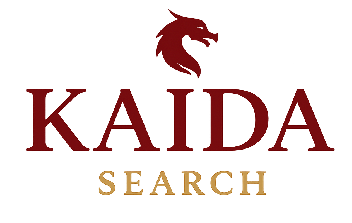


---



# ***Analisando os dados da Pesquisa***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Insira os dados salvos na pesquisa após descompactado. As respostas devem estar no formato "CSV" e salvos com o nome "Praticas ESG em T.I" que é o padrão da ferramenta.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Praticas ESG em T.I.csv to Praticas ESG em T.I.csv


In [3]:
df = pd.read_csv('/content/Praticas ESG em T.I.csv', sep=',', encoding='utf-8')

In [4]:
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace('  ', ' ', regex=False)
df.columns

Index(['Carimbo de data/hora', 'Pontuação total',
       '1. Qual a sua faixa etária?',
       '1. Qual a sua faixa etária? [Pontuação]',
       '1. Qual a sua faixa etária? [Feedback]',
       '2. Qual é o seu nível de formação?',
       '2. Qual é o seu nível de formação?  [Pontuação]',
       '2. Qual é o seu nível de formação?  [Feedback]',
       '3. Você já ouviu falar sobre práticas ESG (Ambiental, Social e Governança)?',
       '3. Você já ouviu falar sobre práticas ESG (Ambiental, Social e Governança)? [Pontuação]',
       '3. Você já ouviu falar sobre práticas ESG (Ambiental, Social e Governança)? [Feedback]',
       '4.Você saberia explicar o que são práticas ESG?',
       '4.Você saberia explicar o que são práticas ESG? [Pontuação]',
       '4.Você saberia explicar o que são práticas ESG? [Feedback]',
       '5. Você acha importante que profissionais de TI conheçam e apliquem princípios ESG no seu trabalho?',
       '5. Você acha importante que profissionais de TI conheçam 

In [5]:
df.head()

,Carimbo de data/hora,Pontuação total,1. Qual a sua faixa etária?,1. Qual a sua faixa etária? [Pontuação],1. Qual a sua faixa etária? [Feedback],2. Qual é o seu nível de formação?,2. Qual é o seu nível de formação? [Pontuação],2. Qual é o seu nível de formação? [Feedback],"3. Você já ouviu falar sobre práticas ESG (Ambiental, Social e Governança)?","3. Você já ouviu falar sobre práticas ESG (Ambiental, Social e Governança)? [Pontuação]",...,5. Você acha importante que profissionais de TI conheçam e apliquem princípios ESG no seu trabalho? [Feedback],"6. Na empresa onde você trabalha (ou trabalhou mais recentemente), existe alguma política ou ação voltada às práticas ESG?","6. Na empresa onde você trabalha (ou trabalhou mais recentemente), existe alguma política ou ação voltada às práticas ESG? [Pontuação]","6. Na empresa onde você trabalha (ou trabalhou mais recentemente), existe alguma política ou ação voltada às práticas ESG? [Feedback]","7. Na sua opinião, qual área da TI pode mais contribuir com as práticas ESG?","7. Na sua opinião, qual área da TI pode mais contribuir com as práticas ESG? [Pontuação]","7. Na sua opinião, qual área da TI pode mais contribuir com as práticas ESG? [Feedback]",8. Você gostaria de aprender mais sobre ESG aplicado à área de TI?,8. Você gostaria de aprender mais sobre ESG aplicado à área de TI? [Pontuação],8. Você gostaria de aprender mais sobre ESG aplicado à área de TI? [Feedback]
0,2025/07/10 1:25:24 PM GMT-3,0.00 / 100,Entre 40 e 50,-- / 0,NaN,Outros,-- / 0,NaN,Sim,-- / 0,...,NaN,Não existe,-- / 0,NaN,Manutenção,-- / 0,NaN,Talvez,-- / 100,NaN
1,2025/07/10 1:33:04 PM GMT-3,0.00 / 100,Entre 40 e 50,-- / 0,NaN,Outros,-- / 0,NaN,Sim,-- / 0,...,NaN,Não sei informar,-- / 0,NaN,Segurança,-- / 0,NaN,Sim,-- / 100,NaN
2,2025/07/10 1:39:30 PM GMT-3,0.00 / 100,Entre 20 e 30,-- / 0,NaN,Técnico em T.I,-- / 0,NaN,Sim,-- / 0,...,NaN,"Sim, formal e divulgada",-- / 0,NaN,Gestão de Dados e Sistemas,-- / 0,NaN,Não,-- / 100,NaN
3,2025/07/10 1:40:30 PM GMT-3,0.00 / 100,Entre 40 e 50,-- / 0,NaN,Superior Completo,-- / 0,NaN,Sim,-- / 0,...,NaN,Não sei informar,-- / 0,NaN,NaN,-- / 0,NaN,Não,-- / 100,NaN
4,2025/07/10 2:05:55 PM GMT-3,0.00 / 100,Entre 30 e 40,-- / 0,NaN,Técnico em T.I,-- / 0,NaN,Sim,-- / 0,...,NaN,Não sei informar,-- / 0,NaN,Todas,-- / 0,NaN,Talvez,-- / 100,NaN


In [6]:
df = df[[col for col in df.columns if '[Pontuação]' not in col and '[Feedback]' not in col]]


In [7]:
# Remove espaços e quebras de linha dos nomes das colunas
df.columns = df.columns.str.strip()

# Agora renomeia corretamente
df = df.rename(columns={
    '1. Qual a sua faixa etária?': 'Faixa Etária',
    '2. Qual é o seu nível de formação?': 'Formação',
    '3. Você já ouviu falar sobre práticas ESG (Ambiental, Social e Governança)?': 'Conhece ESG?',
    '4. Você saberia explicar o que são práticas ESG?': 'Sabe explicar?',
    '5. Você acha importante que profissionais de TI conheçam e apliquem princípios ESG no seu trabalho?': 'Importância',
    '6. Na empresa onde você trabalha (ou trabalhou mais recentemente), existe alguma política ou ação voltada às práticas ESG?': 'Conhecimento da política ESG?',
    '7. Na sua opinião, qual área da TI pode mais contribuir com as práticas ESG?': 'Área da TI Atuante',
    '8. Você gostaria de aprender mais sobre ESG aplicado à área de TI?': 'Gostaria de aprender sobre ESG ?'
})



In [8]:
print(df.columns.tolist())


['Carimbo de data/hora', 'Pontuação total', 'Faixa Etária', 'Formação', 'Conhece ESG?', '4.Você saberia explicar o que são práticas ESG?', 'Importância', 'Conhecimento da política ESG?', 'Área da TI Atuante', 'Gostaria de aprender sobre ESG ?']


In [9]:
df = df.drop(columns=['Carimbo de data/hora', 'Pontuação total'], errors='ignore')


In [10]:
print(df.head())

    Faixa Etária           Formação Conhece ESG?  \
0  Entre 40 e 50             Outros          Sim   
1  Entre 40 e 50             Outros          Sim   
2  Entre 20 e 30     Técnico em T.I          Sim   
3  Entre 40 e 50  Superior Completo          Sim   
4  Entre 30 e 40     Técnico em T.I          Sim   

  4.Você saberia explicar o que são práticas ESG?              Importância  \
0       Tenho uma noção, mas não saberia explicar                      Sim   
1       Tenho uma noção, mas não saberia explicar                      Sim   
2       Tenho uma noção, mas não saberia explicar                      Não   
3                         Sim com total segurança                      Sim   
4                                     Não saberia  Nunca pensei sobre isso   

  Conhecimento da política ESG?          Área da TI Atuante  \
0                    Não existe                 Manutenção    
1              Não sei informar                  Segurança    
2       Sim, formal e divulga

In [11]:
df.head()

,Faixa Etária,Formação,Conhece ESG?,4.Você saberia explicar o que são práticas ESG?,Importância,Conhecimento da política ESG?,Área da TI Atuante,Gostaria de aprender sobre ESG ?
0,Entre 40 e 50,Outros,Sim,"Tenho uma noção, mas não saberia explicar",Sim,Não existe,Manutenção,Talvez
1,Entre 40 e 50,Outros,Sim,"Tenho uma noção, mas não saberia explicar",Sim,Não sei informar,Segurança,Sim
2,Entre 20 e 30,Técnico em T.I,Sim,"Tenho uma noção, mas não saberia explicar",Não,"Sim, formal e divulgada",Gestão de Dados e Sistemas,Não
3,Entre 40 e 50,Superior Completo,Sim,Sim com total segurança,Sim,Não sei informar,NaN,Não
4,Entre 30 e 40,Técnico em T.I,Sim,Não saberia,Nunca pensei sobre isso,Não sei informar,Todas,Talvez


In [12]:
df.shape

(23, 8)

# Nível de Formação dos Entrevistados

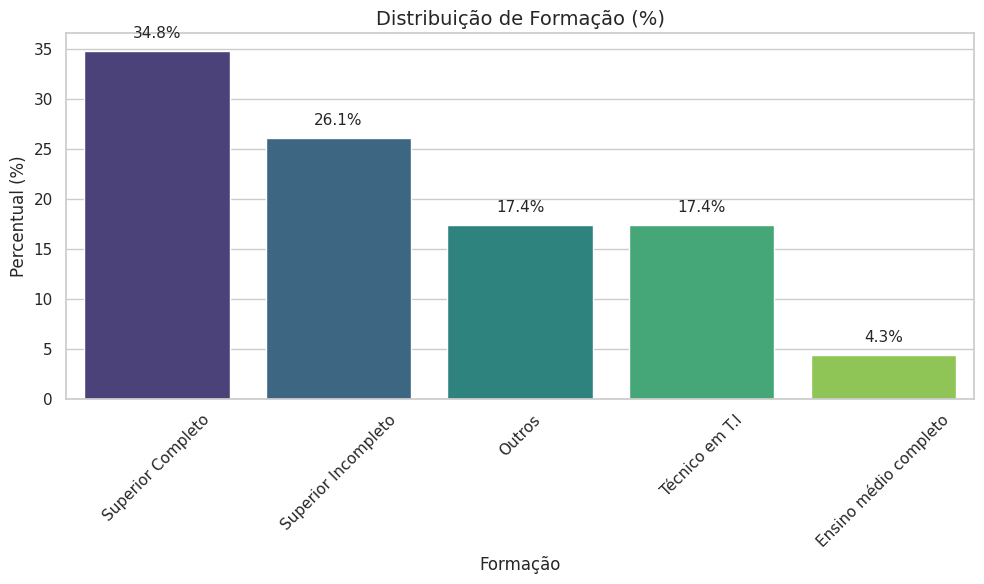

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Opcional: oculta warnings futuros do seaborn
warnings.filterwarnings("ignore", category=FutureWarning)

# Configura estilo dos gráficos
sns.set(style="whitegrid")

# Contagem e cálculo de percentual
form_counts = df['Formação'].value_counts()
form_percent = (form_counts / form_counts.sum()) * 100

# Cria o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=form_percent.index,
    y=form_percent.values,
    hue=form_percent.index,  # aplica hue igual ao eixo x
    palette='viridis',
    legend=False              # desativa legenda duplicada
)

# Adiciona os rótulos de percentual no topo das colunas
for i, value in enumerate(form_percent.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=11)

# Ajustes finais
plt.title('Distribuição de Formação (%)', fontsize=14)
plt.ylabel('Percentual (%)')
plt.xlabel('Formação')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Faixa Etária dos Entrevistados

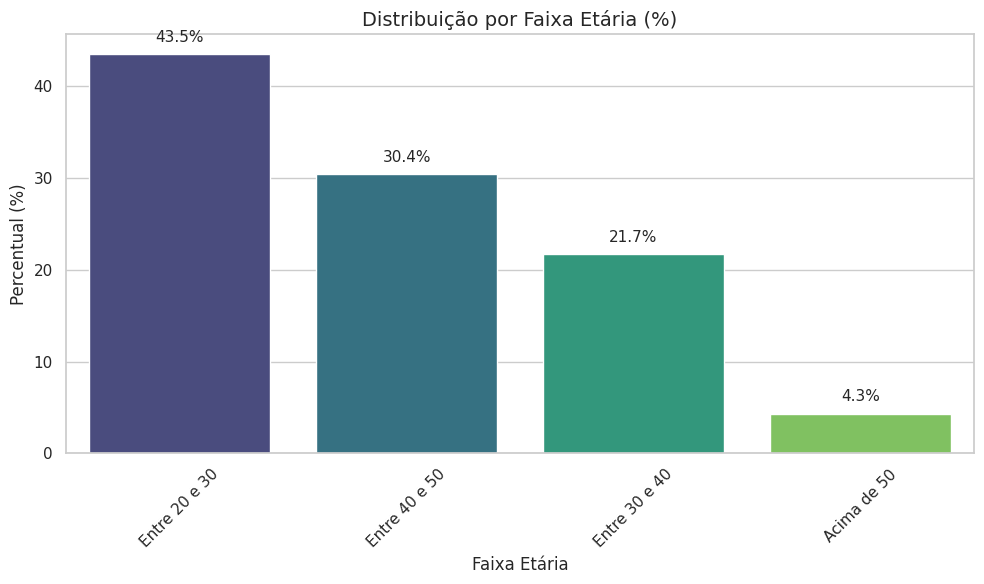

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Oculta avisos futuros do seaborn
warnings.filterwarnings("ignore", category=FutureWarning)

# Configura estilo dos gráficos
sns.set(style="whitegrid")

# Contagem e cálculo de percentual da coluna Faixa Etária
age_counts = df['Faixa Etária'].value_counts()
age_percent = (age_counts / age_counts.sum()) * 100

# Cria o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=age_percent.index,
    y=age_percent.values,
    hue=age_percent.index,
    palette='viridis',
    legend=False
)

# Adiciona os rótulos de percentual no topo das colunas
for i, value in enumerate(age_percent.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=11)

# Ajustes finais
plt.title('Distribuição por Faixa Etária (%)', fontsize=14)
plt.ylabel('Percentual (%)')
plt.xlabel('Faixa Etária')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Conhecimento sobre ESG

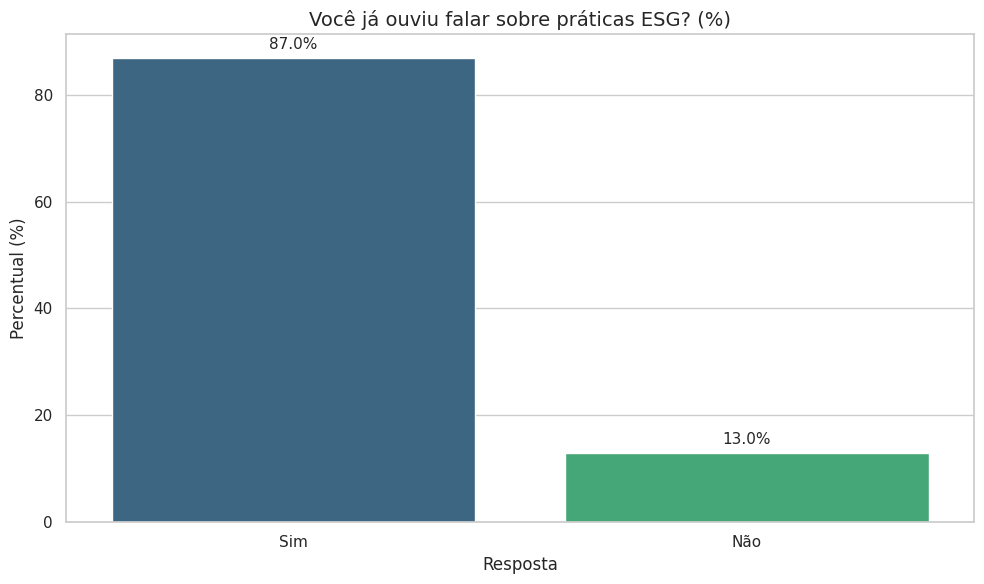

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Oculta avisos futuros do seaborn
warnings.filterwarnings("ignore", category=FutureWarning)

# Estilo visual
sns.set(style="whitegrid")

# Contagem e percentual da coluna 'Conhece ESG?'
esg_conhece_counts = df['Conhece ESG?'].value_counts()
esg_conhece_percent = (esg_conhece_counts / esg_conhece_counts.sum()) * 100

# Criação do gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=esg_conhece_percent.index,
    y=esg_conhece_percent.values,
    hue=esg_conhece_percent.index,
    palette='viridis',
    legend=False
)

# Rótulos de percentual no topo
for i, value in enumerate(esg_conhece_percent.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=11)

# Ajustes de visual
plt.title('Você já ouviu falar sobre práticas ESG? (%)', fontsize=14)
plt.ylabel('Percentual (%)')
plt.xlabel('Resposta')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Grau de Conhecimento sobre ESG

In [16]:
df.columns = df.columns.str.strip()  # garantir que não há espaços/quebras de linha
df = df.rename(columns={
    '4.Você saberia explicar o que são práticas ESG?': 'Sabe explicar?'
})


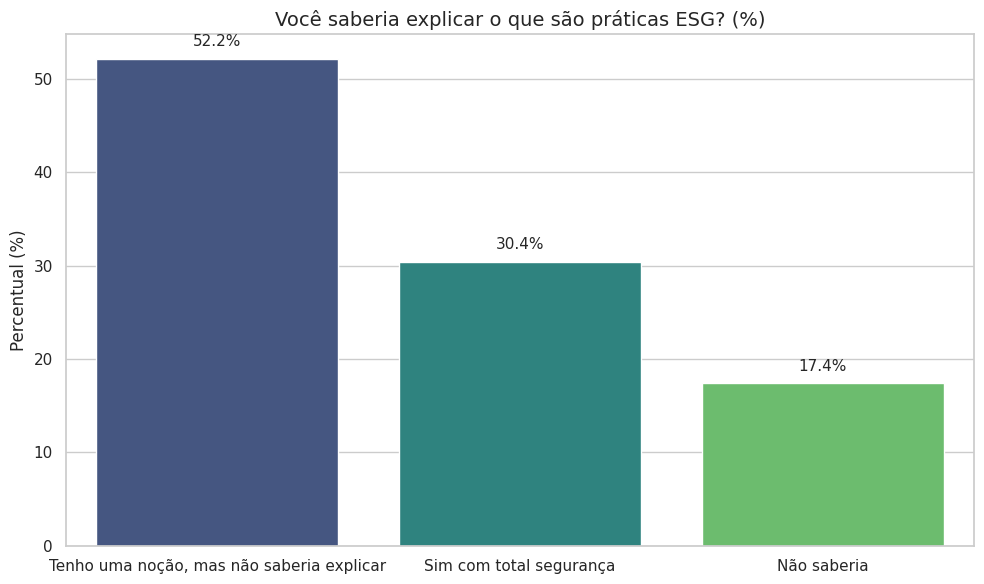

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Oculta avisos futuros
warnings.filterwarnings("ignore", category=FutureWarning)

# Estilo visual
sns.set(style="whitegrid")

# Contagem e percentual da coluna
explica_counts = df['Sabe explicar?'].value_counts()
explica_percent = (explica_counts / explica_counts.sum()) * 100

# Criação do gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=explica_percent.index,
    y=explica_percent.values,
    hue=explica_percent.index,
    palette='viridis',
    legend=False
)

# Rótulos no topo
for i, value in enumerate(explica_percent.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=11)

# Ajustes finais
plt.title('Você saberia explicar o que são práticas ESG? (%)', fontsize=14)
plt.ylabel('Percentual (%)')
plt.xlabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Percepção de Importância

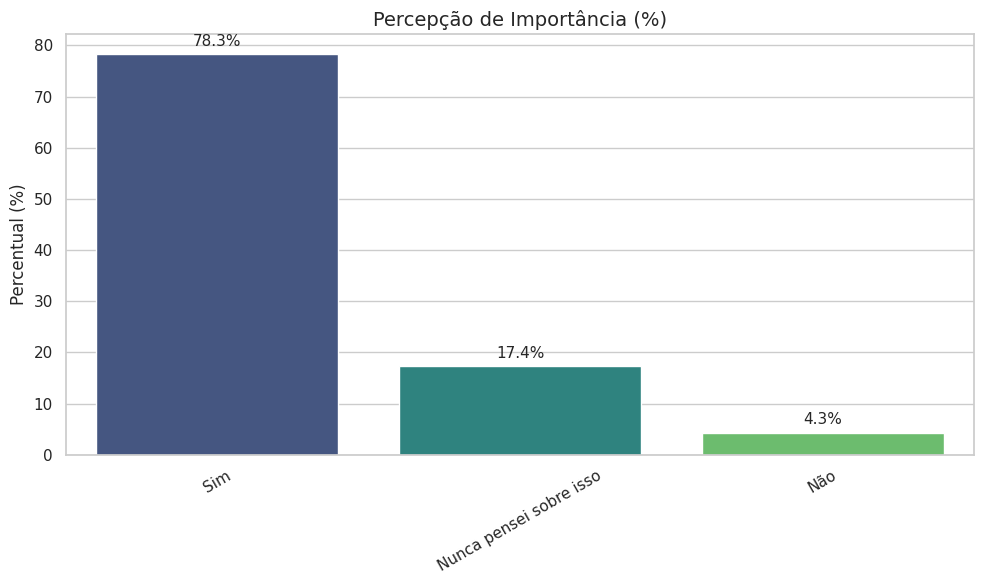

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Oculta avisos futuros
warnings.filterwarnings("ignore", category=FutureWarning)

# Estilo visual
sns.set(style="whitegrid")

# Contagem e percentual da coluna 'Importância'
importancia_counts = df['Importância'].value_counts()
importancia_percent = (importancia_counts / importancia_counts.sum()) * 100

# Criação do gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=importancia_percent.index,
    y=importancia_percent.values,
    hue=importancia_percent.index,
    palette='viridis',
    legend=False
)

# Rótulos no topo das barras
for i, value in enumerate(importancia_percent.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=11)

# Ajustes finais
plt.title('Percepção de Importância (%)', fontsize=14)
plt.ylabel('Percentual (%)')
plt.xlabel('')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


# Conhecimento da política ESG da empresa?

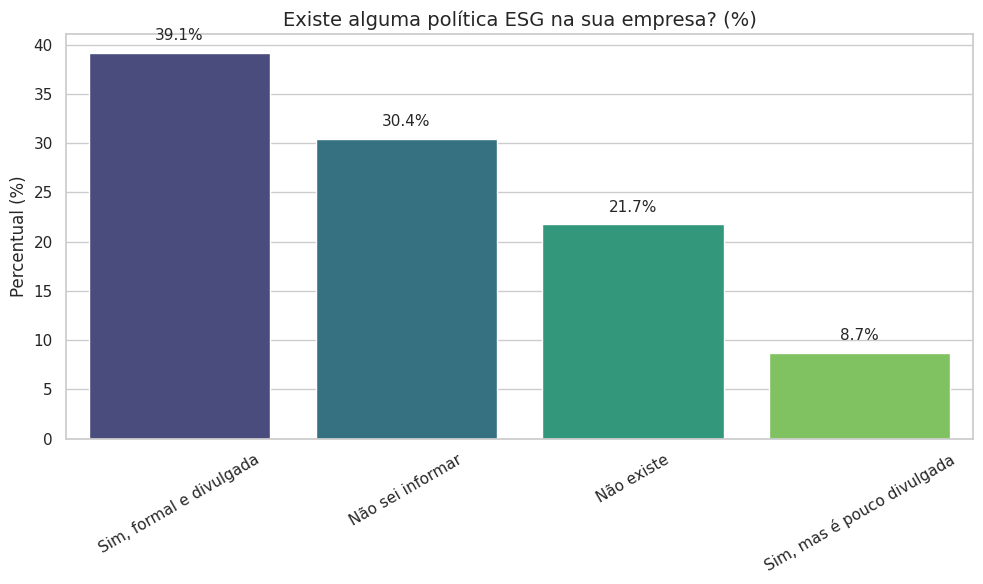

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Oculta avisos futuros
warnings.filterwarnings("ignore", category=FutureWarning)

# Estilo visual
sns.set(style="whitegrid")

# Contagem e percentual da coluna
politica_counts = df['Conhecimento da política ESG?'].value_counts()
politica_percent = (politica_counts / politica_counts.sum()) * 100

# Criação do gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=politica_percent.index,
    y=politica_percent.values,
    hue=politica_percent.index,
    palette='viridis',
    legend=False
)

# Rótulos de percentual no topo das colunas
for i, value in enumerate(politica_percent.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=11)

# Ajustes visuais
plt.title('Existe alguma política ESG na sua empresa? (%)', fontsize=14)
plt.ylabel('Percentual (%)')
plt.xlabel('')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


# Percepção de área responsável

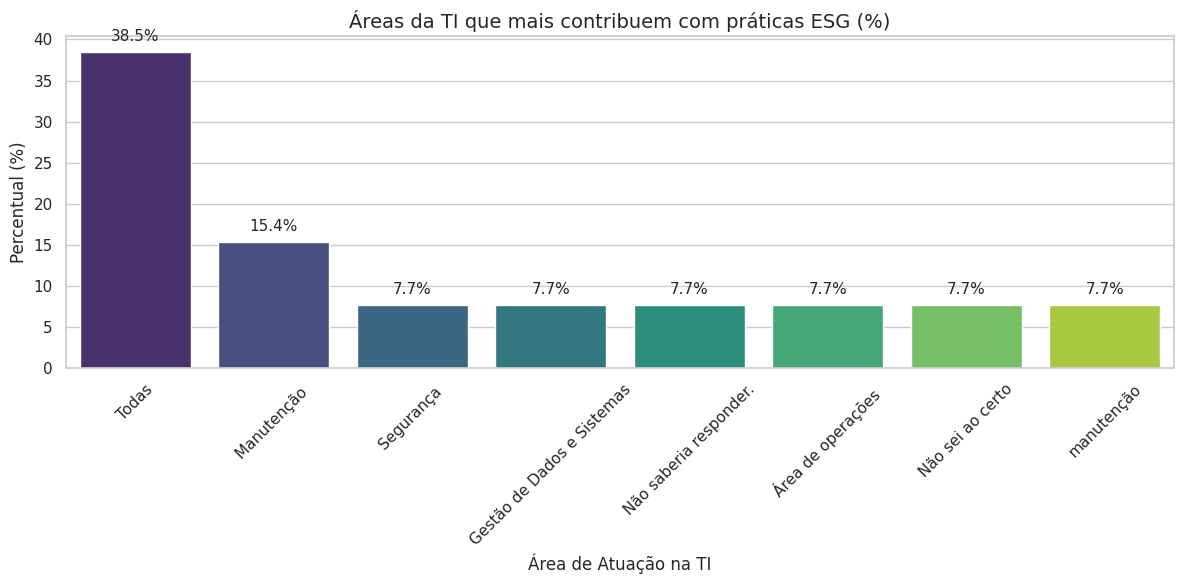

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Oculta avisos futuros
warnings.filterwarnings("ignore", category=FutureWarning)

# Estilo visual
sns.set(style="whitegrid")

# Contagem e percentual
area_counts = df['Área da TI Atuante'].value_counts()
area_percent = (area_counts / area_counts.sum()) * 100

# Criação do gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=area_percent.index,
    y=area_percent.values,
    hue=area_percent.index,
    palette='viridis',
    legend=False
)

# Rótulos de percentual
for i, value in enumerate(area_percent.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=11)

# Ajustes visuais
plt.title('Áreas da TI que mais contribuem com práticas ESG (%)', fontsize=14)
plt.ylabel('Percentual (%)')
plt.xlabel('Área de Atuação na TI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Gostaria de aprender sobre ESG ?

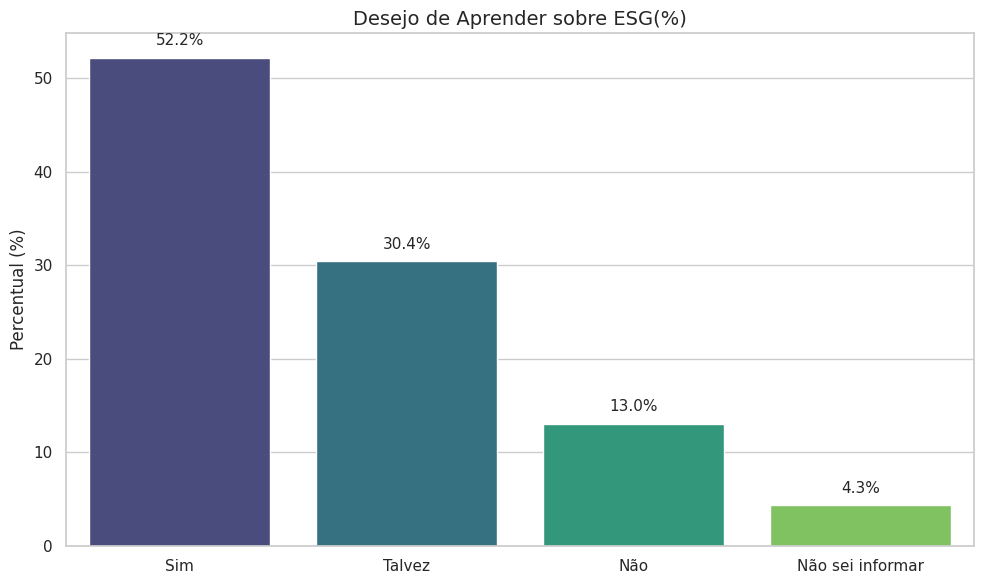

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Oculta avisos futuros
warnings.filterwarnings("ignore", category=FutureWarning)

# Estilo visual
sns.set(style="whitegrid")

# Contagem e percentual
aprender_counts = df['Gostaria de aprender sobre ESG ?'].value_counts()
aprender_percent = (aprender_counts / aprender_counts.sum()) * 100

# Criação do gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=aprender_percent.index,
    y=aprender_percent.values,
    hue=aprender_percent.index,
    palette='viridis',
    legend=False
)

# Rótulos de percentual no topo das colunas
for i, value in enumerate(aprender_percent.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=11)

# Ajustes finais
plt.title('Desejo de Aprender sobre ESG(%)', fontsize=14)
plt.ylabel('Percentual (%)')
plt.xlabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [22]:
df.head()


,Faixa Etária,Formação,Conhece ESG?,Sabe explicar?,Importância,Conhecimento da política ESG?,Área da TI Atuante,Gostaria de aprender sobre ESG ?
0,Entre 40 e 50,Outros,Sim,"Tenho uma noção, mas não saberia explicar",Sim,Não existe,Manutenção,Talvez
1,Entre 40 e 50,Outros,Sim,"Tenho uma noção, mas não saberia explicar",Sim,Não sei informar,Segurança,Sim
2,Entre 20 e 30,Técnico em T.I,Sim,"Tenho uma noção, mas não saberia explicar",Não,"Sim, formal e divulgada",Gestão de Dados e Sistemas,Não
3,Entre 40 e 50,Superior Completo,Sim,Sim com total segurança,Sim,Não sei informar,NaN,Não
4,Entre 30 e 40,Técnico em T.I,Sim,Não saberia,Nunca pensei sobre isso,Não sei informar,Todas,Talvez


# Correlação entre as variáveis

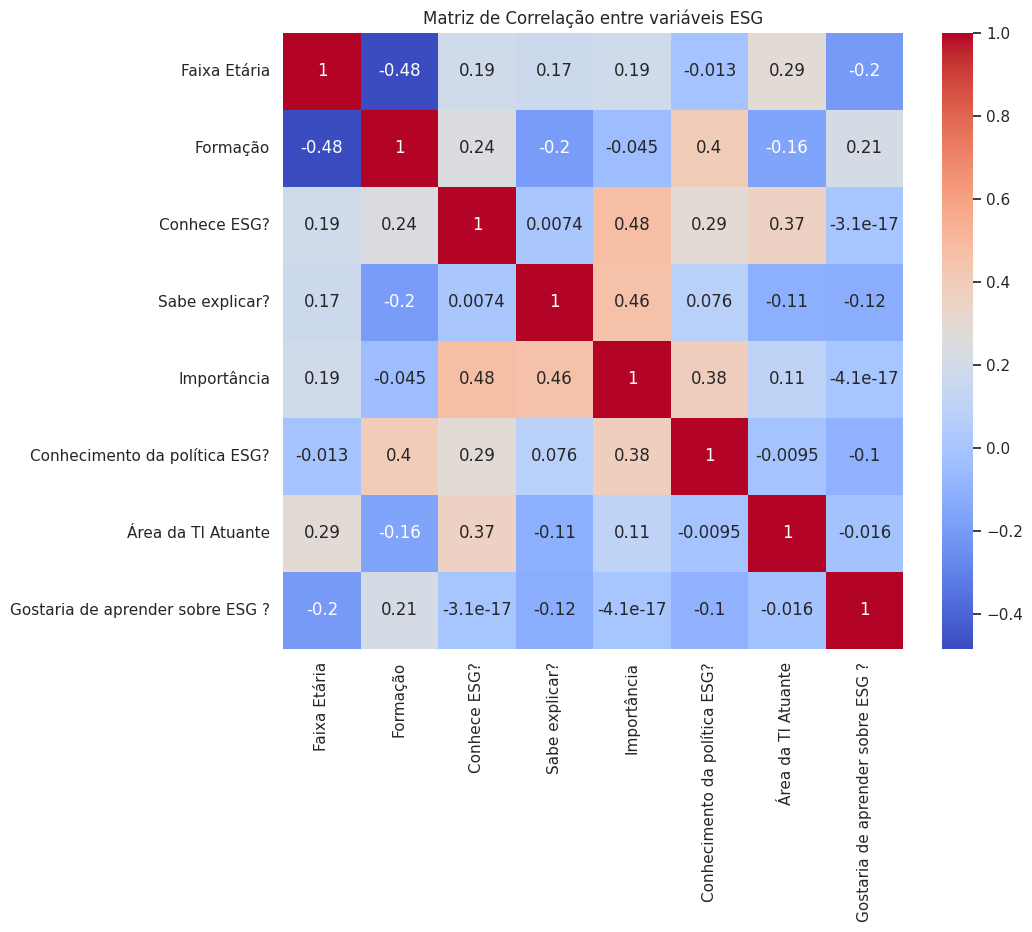

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Converter colunas categóricas em numéricas para correlação
df_encoded = df.copy()
for col in df.columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Matriz de correlação
corr = df_encoded.corr()

# Visualização
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação entre variáveis ESG')
plt.show()


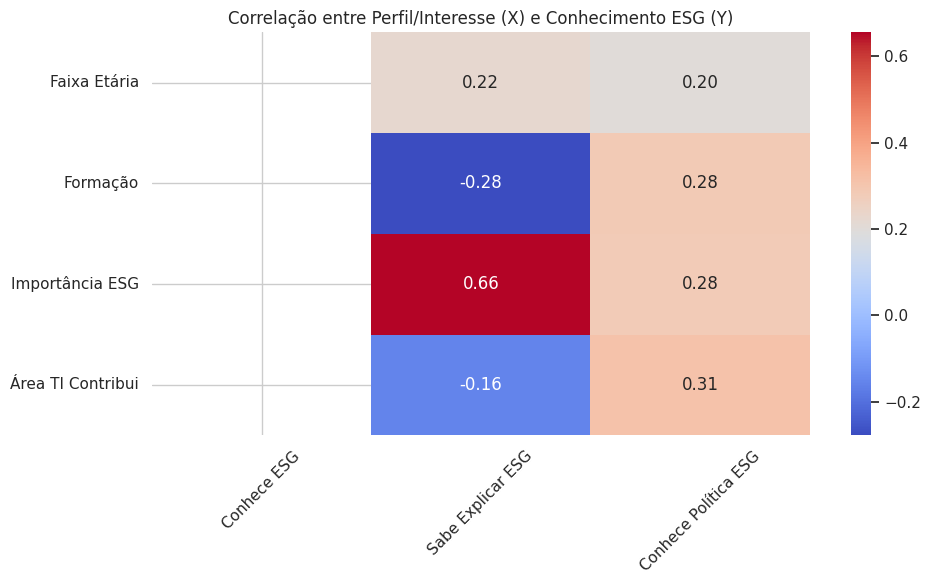

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregamento
df = pd.read_csv('/content/Praticas ESG em T.I.csv', sep=',', encoding='utf-8')
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace('  ', ' ', regex=False)

# Seleção das colunas de interesse
df_selected = df[[
    '1. Qual a sua faixa etária?',
    '2. Qual é o seu nível de formação?',
    '5. Você acha importante que profissionais de TI conheçam e apliquem princípios ESG no seu trabalho?',
    '7. Na sua opinião, qual área da TI pode mais contribuir com as práticas ESG?',
    '3. Você já ouviu falar sobre práticas ESG (Ambiental, Social e Governança)?',
    '4.Você saberia explicar o que são práticas ESG?',
    '6. Na empresa onde você trabalha (ou trabalhou mais recentemente), existe alguma política ou ação voltada às práticas ESG?'
]]

# Renomeando para simplificar a análise
df_selected.columns = [
    'Faixa Etária',
    'Formação',
    'Importância ESG',
    'Área TI Contribui',
    'Conhece ESG',
    'Sabe Explicar ESG',
    'Conhece Política ESG'
]

# Tratamento de valores ausentes
df_selected = df_selected.dropna()

# Codificando variáveis categóricas
df_encoded = df_selected.apply(lambda col: col.astype('category').cat.codes)

# Definindo X e Y
X_cols = ['Faixa Etária', 'Formação', 'Importância ESG', 'Área TI Contribui']
Y_cols = ['Conhece ESG', 'Sabe Explicar ESG', 'Conhece Política ESG']

# Correlação entre X e Y
corr_matrix = df_encoded[X_cols + Y_cols].corr()
corr_xy = corr_matrix.loc[X_cols, Y_cols]

# Visualização
plt.figure(figsize=(10, 6))
sns.heatmap(corr_xy, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Perfil/Interesse (X) e Conhecimento ESG (Y)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Resultados e Conclusão

In [25]:
# Gerador automático de insights sobre a matriz de correlação

def gerar_insights(corr_df, lim_forte=0.5, lim_moderado=0.3, lim_fraco=0.1):
    insights = []
    for x_var in corr_df.index:
        for y_var in corr_df.columns:
            corr = corr_df.loc[x_var, y_var]
            interpretacao = ""

            if corr >= lim_forte:
                interpretacao = f"forte correlação positiva ({corr:.2f})"
            elif corr >= lim_moderado:
                interpretacao = f"correlação moderada ({corr:.2f})"
            elif corr >= lim_fraco:
                interpretacao = f"correlação fraca ({corr:.2f})"
            elif corr <= -lim_forte:
                interpretacao = f"forte correlação negativa ({corr:.2f})"
            elif corr <= -lim_moderado:
                interpretacao = f"correlação negativa moderada ({corr:.2f})"
            elif corr <= -lim_fraco:
                interpretacao = f"correlação negativa fraca ({corr:.2f})"
            else:
                continue  # correlações muito fracas (próximas de zero) são ignoradas

            frase = f"- A variável **'{x_var}'** tem {interpretacao} com **'{y_var}'**."
            insights.append(frase)

    return "\n".join(insights)

# Aplicando a função à sua matriz
texto_insights = gerar_insights(corr_xy)
print("📌 INSIGHTS AUTOMÁTICOS BASEADOS NA CORRELAÇÃO:\n")
print(texto_insights)


📌 INSIGHTS AUTOMÁTICOS BASEADOS NA CORRELAÇÃO:

- A variável **'Faixa Etária'** tem correlação fraca (0.22) com **'Sabe Explicar ESG'**.
- A variável **'Faixa Etária'** tem correlação fraca (0.20) com **'Conhece Política ESG'**.
- A variável **'Formação'** tem correlação negativa fraca (-0.28) com **'Sabe Explicar ESG'**.
- A variável **'Formação'** tem correlação fraca (0.28) com **'Conhece Política ESG'**.
- A variável **'Importância ESG'** tem forte correlação positiva (0.66) com **'Sabe Explicar ESG'**.
- A variável **'Importância ESG'** tem correlação fraca (0.28) com **'Conhece Política ESG'**.
- A variável **'Área TI Contribui'** tem correlação negativa fraca (-0.16) com **'Sabe Explicar ESG'**.
- A variável **'Área TI Contribui'** tem correlação moderada (0.31) com **'Conhece Política ESG'**.
